<a href="https://colab.research.google.com/github/nasif-raihan/ML-and-DL-Codes/blob/main/Potato_Disease_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup & Load Data

In [ ]:
from google.colab import drive

drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [ ]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 5

In [ ]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/Datasets/PlantVillage',
    shuffle = True,
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [ ]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

**68 batches of images.** Each batch contains 32 images.

68*32 
= 

**2176 >= 2152**

In [ ]:
len(dataset)

68

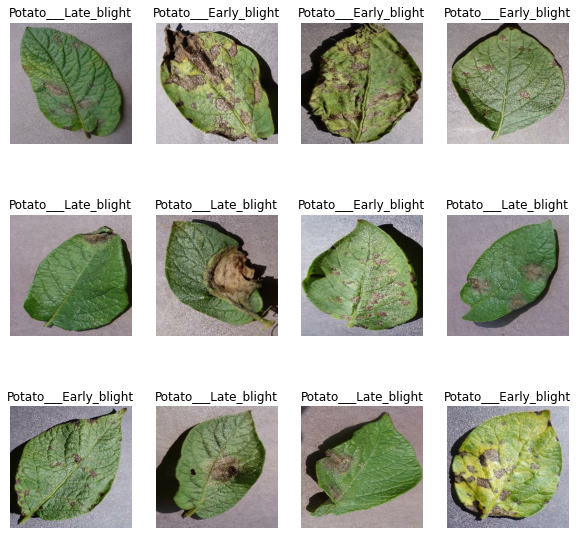

In [ ]:
plt.figure(figsize=(10, 10))

for image_batch, label_batch in dataset.take(1):
  # print(image_batch.shape)
  # print(label_batch)
  for i in range(12):
    ax = plt.subplot(3, 4, i+1)
    plt.imshow(image_batch[i].numpy().astype('uint8'))
    plt.title(class_names[label_batch[i]])
    plt.axis('off')

80\% On **Training**.

10\% On **Validation**.

10\% On **Testing**. 

In [ ]:
# train_size = 0.8
# val_size = 0.1

# train_ds = dataset.take(54) #[:54]

# test_ds = dataset.skip(54)  #[54:]

# val_ds = test_ds.take(round(len(dataset)*val_size))

# Train, Test, Validation Data Split & Data Augmentation

In [ ]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=.1, shuffle=True, shuffle_size=1000):
  
  ds_size=len(ds)

  if shuffle:
    ds = ds.shuffle(shuffle_size, seed=12)

  train_ds = ds.take(round(ds_size*train_split)) #[:54]

  test_ds = ds.skip(round(ds_size*train_split)).take(round(len(dataset)*test_split))  #[54:]

  val_ds = ds.skip(round(ds_size*train_split)).skip(round(len(dataset)*test_split))

  return train_ds, test_ds, val_ds



In [ ]:
train_ds, test_ds, val_ds = get_dataset_partitions_tf(dataset)

In [ ]:
len(train_ds), len(test_ds), len(val_ds)

(54, 7, 7)

In [ ]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
resize_and_rescale = tf.keras.Sequential(
    [
     layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
     layers.experimental.preprocessing.Rescaling(1.0/255)
    ]
)

In [ ]:
data_augmentation = tf.keras.Sequential(
    [
     layers.experimental.preprocessing.RandomFlip('horizontal_and_vertical'),
     layers.experimental.preprocessing.RandomRotation(0.2)
    ]
)

# Model Building

In [ ]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential(
    [
     resize_and_rescale,
     data_augmentation,
     layers.Conv2D(32, (3,3), activation = 'relu', input_shape = input_shape),
     layers.MaxPooling2D((2,2)),
     layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'),
     layers.MaxPooling2D((2,2)),
     layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'),
     layers.MaxPooling2D((2,2)),
     layers.Conv2D(64, (3,3), activation = 'relu'),
     layers.MaxPooling2D((2,2)),
     layers.Conv2D(64, (3,3), activation = 'relu'),
     layers.MaxPooling2D((2,2)),
     layers.Conv2D(64, (3,3), activation = 'relu'),
     layers.MaxPooling2D((2,2)),
     layers.Flatten(),
     layers.Dense(64, activation = 'relu'),
     layers.Dense(n_classes, activation = 'softmax')
    ]
)

model.build(input_shape = input_shape)

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                  

In [ ]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics = ['accuracy']
)

In [ ]:
history = model.fit(
    train_ds,
    epochs = EPOCHS,
    batch_size = BATCH_SIZE,
    verbose = 1,
    validation_data = val_ds
    )

Epoch 1/5
54/54 [==============================] - 185s 3s/step - loss: 0.2351 - accuracy: 0.9109 - val_loss: 0.1400 - val_accuracy: 0.9420
Epoch 2/5
54/54 [==============================] - 181s 3s/step - loss: 0.1840 - accuracy: 0.9288 - val_loss: 0.3060 - val_accuracy: 0.8839
Epoch 3/5
54/54 [==============================] - 182s 3s/step - loss: 0.1874 - accuracy: 0.9317 - val_loss: 0.0918 - val_accuracy: 0.9643
Epoch 4/5
54/54 [==============================] - 181s 3s/step - loss: 0.1787 - accuracy: 0.9300 - val_loss: 0.1482 - val_accuracy: 0.9464
Epoch 5/5
54/54 [==============================] - 181s 3s/step - loss: 0.1526 - accuracy: 0.9450 - val_loss: 0.1120 - val_accuracy: 0.9598


# 

In [ ]:
scores = model.evaluate(test_ds)

scores

7/7 [==============================] - 6s 786ms/step - loss: 0.3510 - accuracy: 0.8393


[0.3510217070579529, 0.8392857313156128]

In [ ]:
history.params

{'epochs': 5, 'steps': 54, 'verbose': 1}

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

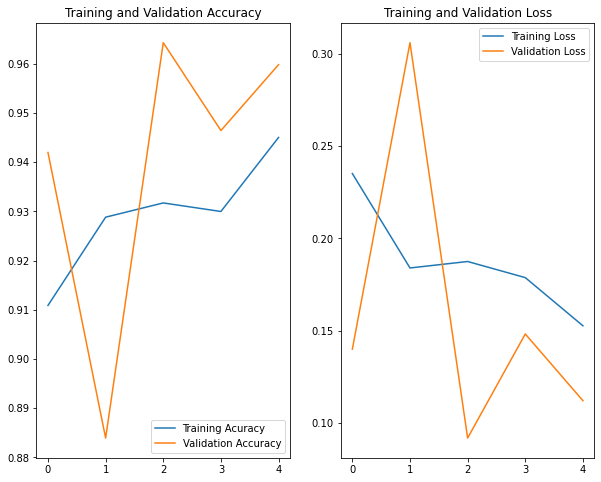

In [ ]:
plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Acuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

First Image to predict
Actual Image:  Potato___Late_blight
Predicted Label:  Potato___Late_blight


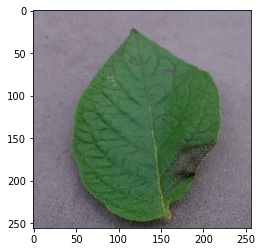

In [ ]:
for images_batch, labels_batch in test_ds.take(1):

  first_image = images_batch[0].numpy().astype('uint8')
  first_label = labels_batch[0].numpy()

  print('First Image to predict')
  plt.imshow(first_image)
  print('Actual Image: ', class_names[first_label])
  
  batch_prediction = model.predict(images_batch)
  print('Predicted Label: ', class_names[np.argmax(batch_prediction[0])])

In [ ]:
def predict(model, img):
  img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
  img_array = tf.expand_dims(img_array, 0)

  predictions = model.predict(img_array)

  predicted_class = class_names[np.argmax(predictions[0])]
  confidence = round(100 * (np.max(predictions[0])), 2)

  return predicted_class, confidence

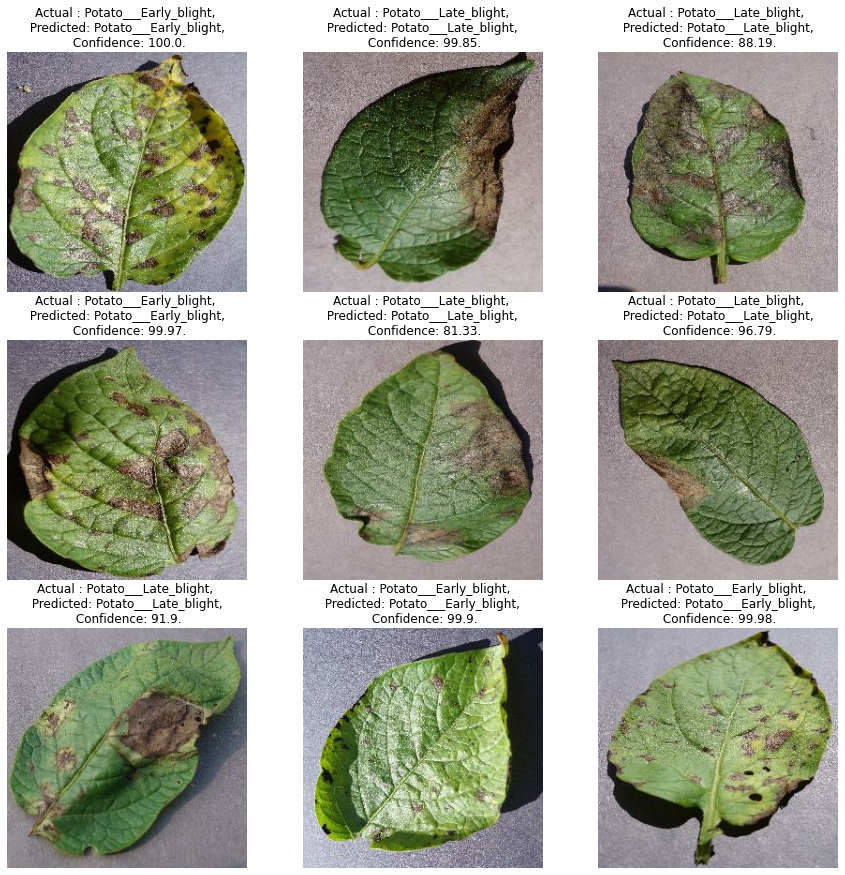

In [ ]:
plt.figure(figsize=(15, 15))

for images, labels in test_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i+1)
    plt.imshow(images[i].numpy().astype('uint8'))

    predicted_class, confidence = predict(model, images[i].numpy())
    actual_class = class_names[labels[i]]

    plt.title(f'Actual : {actual_class}, \n Predicted: {predicted_class}, \n Confidence: {confidence}.')

    plt.axis('off')

In [ ]:
import os
# model_version = max([int(i) for i in os.listdir('../models') + [0]]) + 1
model_version = 1
model.save(f'PDC_models/{model_version}.h5') 